# Today's Coding Topics
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-summmer/2023-07-19/notebook/concept_and_code_demo.ipynb)

* Recap of previous lecture
* Unsupervised Learning - Clustering Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Unsupervised Learning: Clustering Methods

![](https://www.tutorialandexample.com/wp-content/uploads/2019/11/An-example-of-a-cluster-system.png)

![](https://fullcircle-cms.com/fullcircle/storage/uploads/2019/07/03/5d1ca1b9199dbClustering-GIF-2.gif)

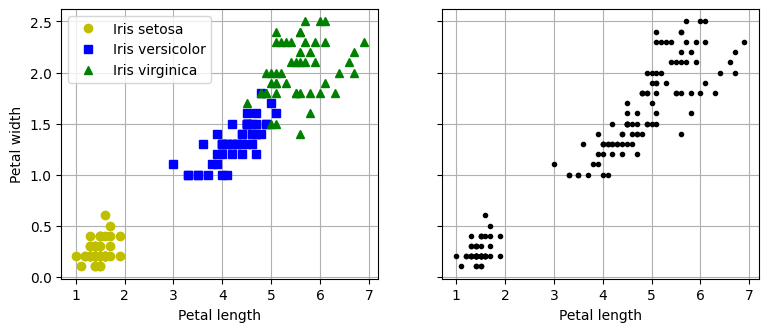

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

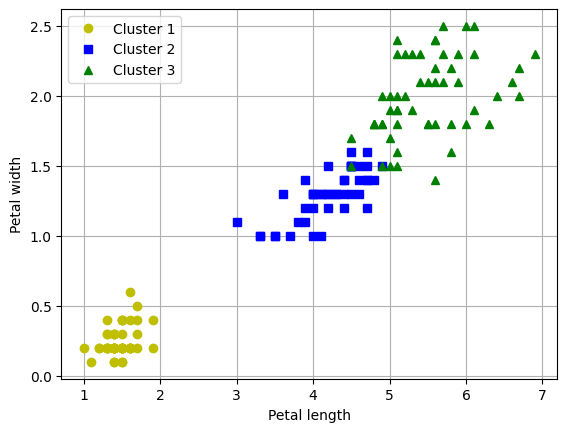

In [3]:
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for cluster_id in np.unique(y_pred):
    most_common_class_id, _ = stats.mode(y[y_pred==cluster_id])
    mapping[cluster_id] = most_common_class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [4]:
(y_pred==y).sum() / len(y_pred)


0.9666666666666667

**Clustering is used in a wide variety of applications**, including:

- Customer segmentation
    - You can cluster your customers based on their purchases and their activity on your website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

- Data analysis
    - When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.

- Dimensionality reduction
    - Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster; affinity is any measure of how well an instance fits into a cluster. Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k-dimensional. The new vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.

- Feature engineering
    - The cluster affinities can often be useful as extra features. For example, we used k-means in Chapter 2 to add geographic cluster affinity features to the California housing dataset, and they helped us get better performance.

- Anomaly detection (also called outlier detection)
    - Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second.

- Semi-supervised learning
    - If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.

- Search engines
    - Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you’d need to do is use the trained clustering model to find this image’s cluster, and you could then simply return all the images from this cluster.

- Image segmentation
    - By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in an image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

## k-Means clustering

### The algorithm
* The model training process
![](https://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

* Pseudo code:
![](https://stanford.edu/~cpiech/cs221/img/kmeansMath.png)

* The model training process (dynamic demonstration)
![](https://miro.medium.com/max/1280/1*rwYaxuY-jeiVXH0fyqC_oA.gif)

### Fit and predict

* Reference on function `make_blobs`: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [5]:
## generate some sample data

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=123)

In [6]:
X

array([[-0.15181454,  2.41345093],
       [-1.39209388,  2.19069284],
       [-2.78188874,  1.88664335],
       ...,
       [-2.82048135,  1.81572732],
       [-2.8358594 ,  1.79380691],
       [-2.6970689 ,  1.77449632]])

In [7]:
X.shape

(2000, 2)

In [8]:
y

array([0, 1, 2, ..., 2, 2, 2])

In [9]:
np.unique(y)

array([0, 1, 2, 3, 4])

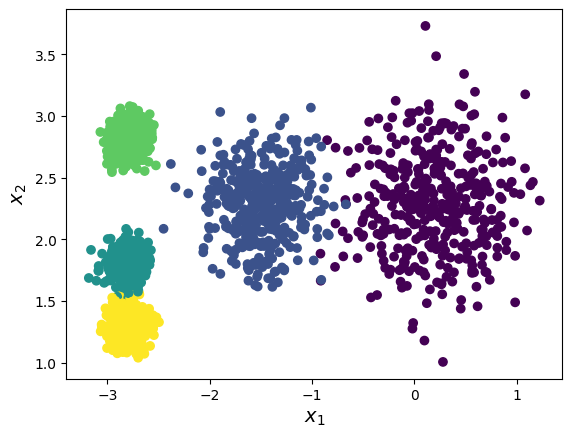

In [10]:
## plot the sample data

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

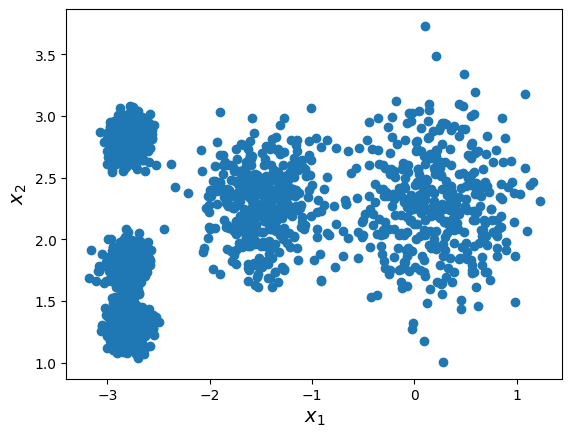

In [11]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [12]:
## Fit a K-Means clustering model

from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=123)
# kmenas.fit(X)
# y_pred = kmeans.predict(X)
y_pred = kmeans.fit_predict(X)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
X[:5]

array([[-0.15181454,  2.41345093],
       [-1.39209388,  2.19069284],
       [-2.78188874,  1.88664335],
       [ 0.41340433,  2.13375225],
       [-2.78558536,  1.2906933 ]])

In [14]:
y_pred[:5]

array([2, 1, 4, 2, 0], dtype=int32)

In [15]:
set(y_pred)

{0, 1, 2, 3, 4}

In [16]:
kmeans.labels_

array([2, 1, 4, ..., 4, 4, 4], dtype=int32)

In [17]:
kmeans.cluster_centers_

array([[-2.79959856,  1.30967879],
       [-1.45400251,  2.28240421],
       [ 0.22211271,  2.29488501],
       [-2.7979204 ,  2.80239567],
       [-2.80240931,  1.80817477]])

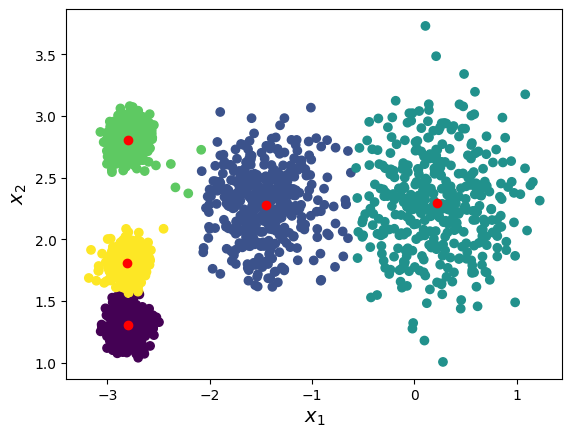

In [18]:
## plot the estimated centroids with the raw data

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')
    
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

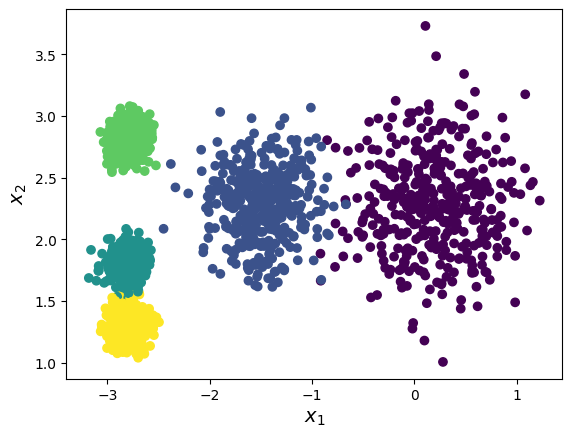

In [19]:
## plot the sample data

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [20]:
## predict labels of new instances

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3], dtype=int32)

In [21]:
kmeans.transform(X_new)

array([[2.88345201, 1.48117367, 0.36917641, 2.91070393, 2.80896687],
       [5.84053823, 4.4629464 , 2.79349512, 5.85318031, 5.80557927],
       [1.70215937, 1.70442129, 3.29836284, 0.28263694, 1.20809332],
       [1.20707303, 1.56123546, 3.22863477, 0.36370222, 0.71948887]])

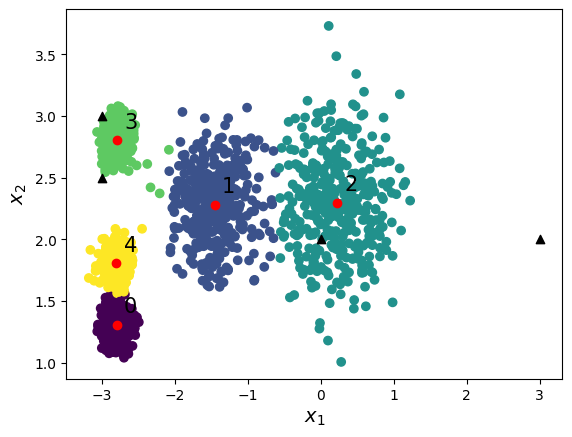

In [21]:
## visualize the new data points

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')
plt.scatter(X_new[:,0], X_new[:,1], marker='^', c='k')


#### label the clusters
centers = kmeans.cluster_centers_
labels = kmeans.predict(centers)
for i in range(5):
    plt.text(centers[i][0]+0.1, centers[i][1]+0.1, labels[i], fontsize=15)

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

### The decision boundaries (the `voronoi diagram`)

In [22]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=2,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

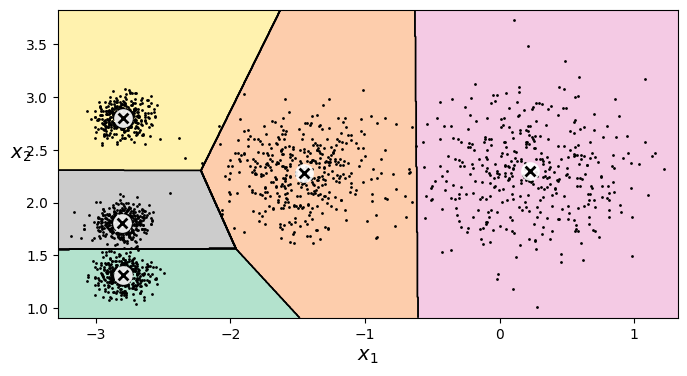

In [24]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

In [25]:
X_new

array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5]])

### The algorithm demonstration

* Initialize the centroids randomly

In [26]:
# help(KMeans)

In [26]:
## run the kmeans algorithm 1, 2, and 3 iterations, see how the centroids move around

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=123)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=2, random_state=123)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=3, random_state=123)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=123)

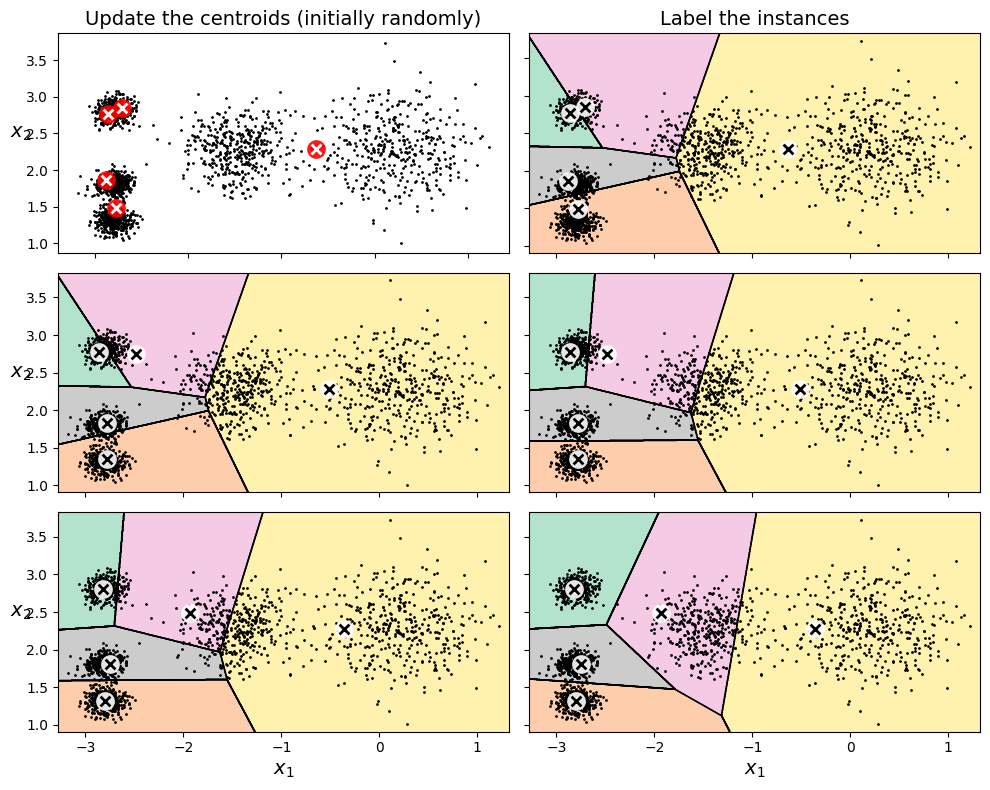

In [28]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.tight_layout()
plt.show()

* Depending on the centroids initialization, the model might converge to different solutions (different local optimums)

In [29]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

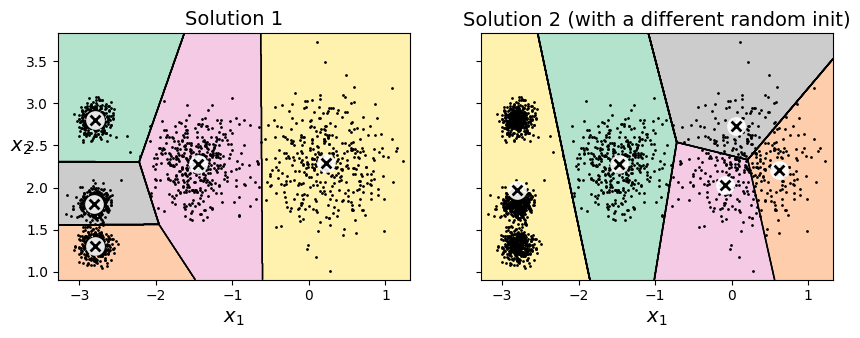

In [30]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=123)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=1)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

* Random number generator and seed

In [31]:
np.random.randint(low=0, high=3, size=5)

array([1, 1, 1, 0, 1])

In [32]:
np.random.randint(low=0, high=3, size=5)

array([1, 2, 2, 1, 2])

In [33]:
np.random.randint(low=0, high=3, size=5)

array([0, 2, 1, 0, 0])

In [34]:
np.random.seed(123)
np.random.randint(low=0, high=3, size=5)

array([2, 1, 2, 2, 0])

In [35]:
np.random.seed(123)
np.random.randint(low=0, high=3, size=5)

array([2, 1, 2, 2, 0])

In [36]:
np.random.randint(low=0, high=3, size=5)

array([2, 2, 1, 2, 1])

In [37]:
np.random.seed(123)
np.random.randint(low=0, high=3, size=5)

array([2, 1, 2, 2, 0])

In [38]:
np.random.seed(1)
np.random.randint(low=0, high=3, size=5)

array([1, 0, 0, 1, 1])

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the `inertia` metric: **sum of the squared distances between each training instance and its closest centroid**.

In [31]:
from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=123)
kmeans.fit(X)
kmeans.inertia_

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


210.31915471169458

In [32]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=123)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=1)

kmeans_rnd_init1.fit(X)
kmeans_rnd_init2.fit(X)

kmeans_rnd_init1.inertia_, kmeans_rnd_init2.inertia_

(210.31915471169458, 606.6251155359678)

In [33]:
X.shape

(2000, 2)

In [34]:
X_dist = kmeans.transform(X)
X_dist.shape

(2000, 5)

In [35]:
X_dist[:5]

array([[2.86863611, 1.30876536, 0.39227473, 2.67453813, 2.71882546],
       [1.66049847, 0.11065105, 1.61756574, 1.53314335, 1.46126989],
       [0.57723629, 1.38560762, 3.03161441, 0.91589264, 0.08110741],
       [3.31699934, 1.8733141 , 0.25011248, 3.28019672, 3.23225278],
       [0.023597  , 1.66030221, 3.1709066 , 1.51175269, 0.51775487]])

In [43]:
kmeans.labels_[:5]

array([2, 1, 4, 2, 0], dtype=int32)

In [36]:
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

210.31915471169387

In [45]:
kmeans.score(X) # the negative inertia

-210.31915471169458

In [37]:
## multiple randomization

k = 5
kmeans_10 = KMeans(n_clusters=k, n_init=10)
kmeans_10.fit(X)
kmeans_10.inertia_

210.31915471169458

In [38]:
kmeans_100 = KMeans(n_clusters=k, n_init=100)
kmeans_100.fit(X)
kmeans_100.inertia_

210.31915471169458

In [39]:
kmeans_500 = KMeans(n_clusters=k, n_init=500)
kmeans_500.fit(X)
kmeans_500.inertia_

210.31915471169458

In [40]:
## manually assign initial centroids

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans_m = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans_m.fit(X)
kmeans_m.inertia_

210.31915471169458

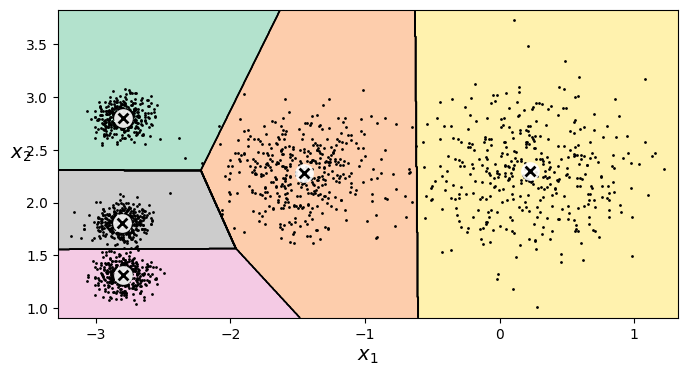

In [41]:
## visualize the best model

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_10, X)
plt.show()

### Find the optimal number of clusters - the "elbow" plot

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


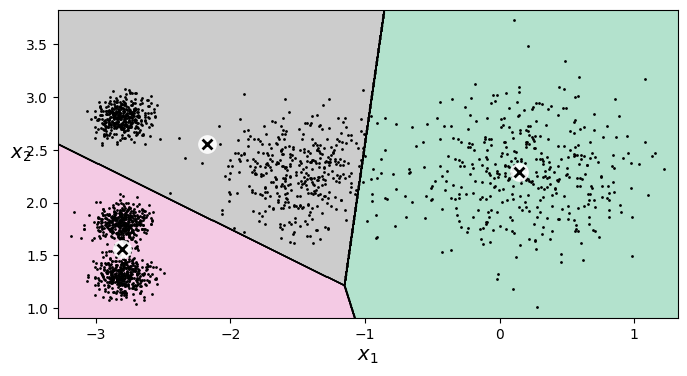

In [49]:
## visualize k = 4
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_3, X)
plt.show()

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


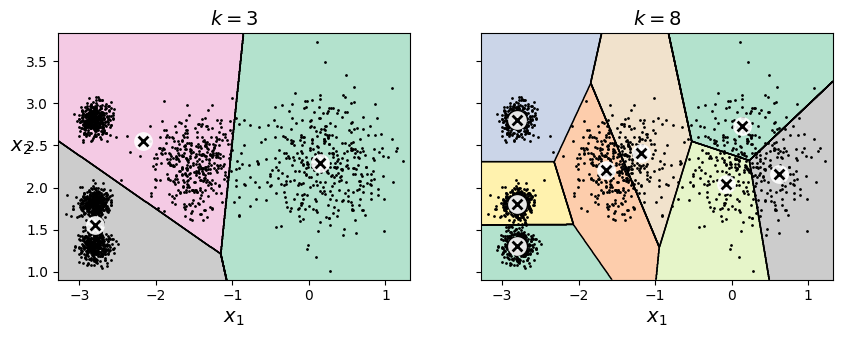

In [43]:
kmeans_k3 = KMeans(n_clusters=3)
kmeans_k8 = KMeans(n_clusters=8)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [44]:
kmeans_k3.inertia_

657.2636468168264

In [45]:
kmeans_k8.inertia_

120.59814711981363

In [46]:
## try different k values

kmeans_per_k = [KMeans(n_clusters=k).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explici

In [48]:
X.shape

(2000, 2)

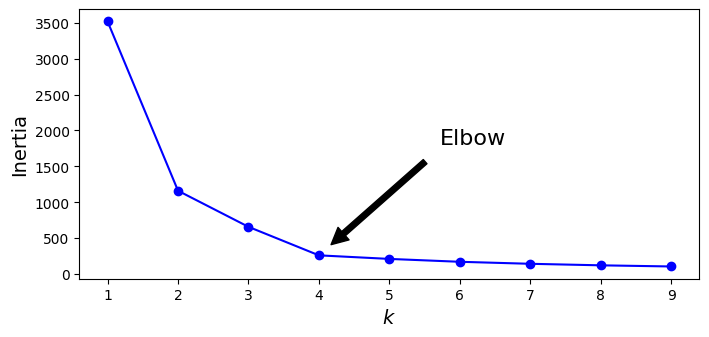

In [47]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
# plt.ylim(0, 1300)
plt.show()

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


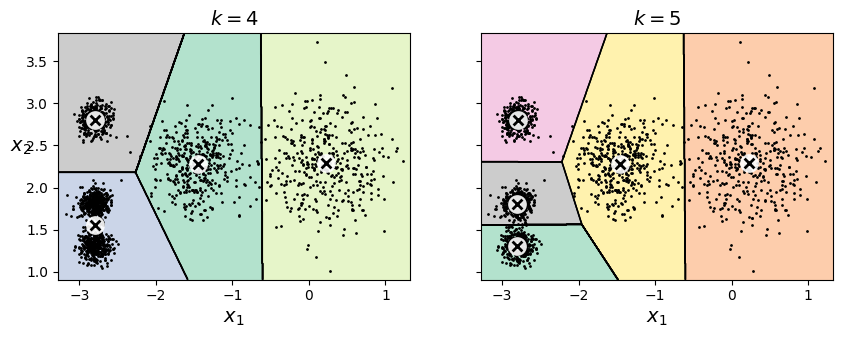

In [50]:
kmeans_k4 = KMeans(n_clusters=4)
kmeans_k5 = KMeans(n_clusters=5)

plot_clusterer_comparison(kmeans_k4, kmeans_k5, X, "$k=4$", "$k=5$")
plt.show()

In [51]:
kmeans_k4.inertia_, kmeans_k5.inertia_

(260.0824303781579, 210.31915471169455)

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

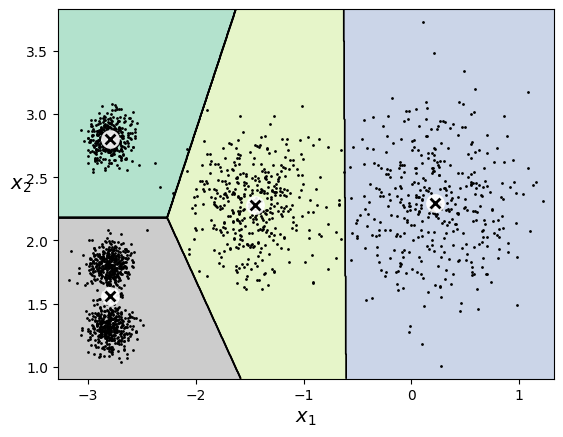

In [52]:
plot_decision_boundaries(kmeans_per_k[3], X)
plt.show()

### Find the optimal number of clusters - the `silhouette score`

The `silhouette score`, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to $\frac{(b - a)}{\max(a, b)}$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

![](https://www.researchgate.net/profile/Frans_Coenen/publication/221570710/figure/fig1/AS:670029003644935@1536758771429/Derivation-of-the-Overall-Silhouette-Coefficient-OverallSil.png)

In [54]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.657769958414177

In [55]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(n_clusters=5, random_state=123)>

In [56]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

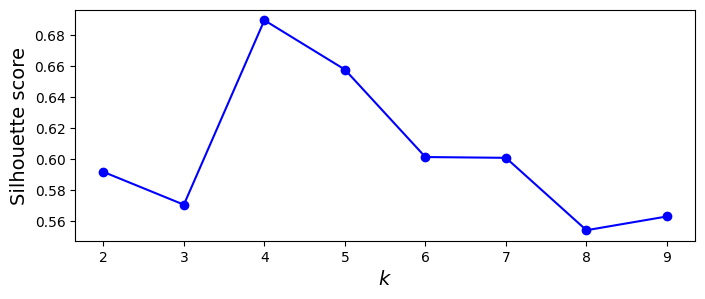

In [57]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

**It confirms that $k=4$ is a very good choice, and it also underlines the fact that $k=5$ is quite good as well, and much better than $k=6$ or $7$.**

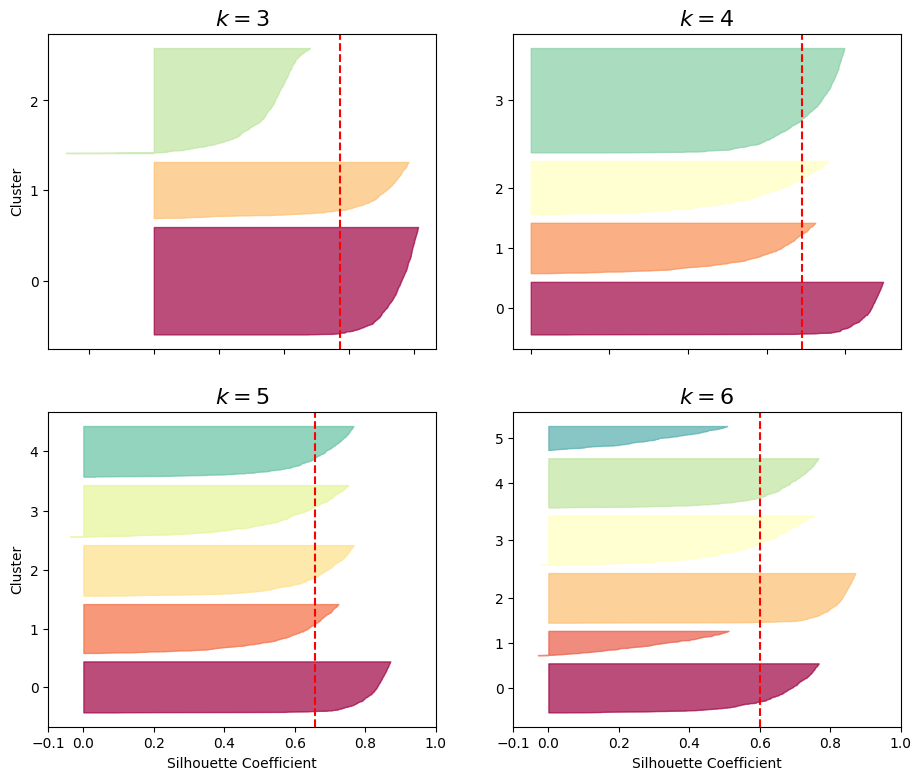

In [58]:
## the silhouette diagram

import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## Limit of K-Means model

* Multiple run is needed to avoid suboptimal solutions
* Need to feed in a fixed `k` value
* Doesn't work well when clusters have varying sizes, different densities, or nonspherical shapes
    * It is important to scale the input features before you run the K-Means

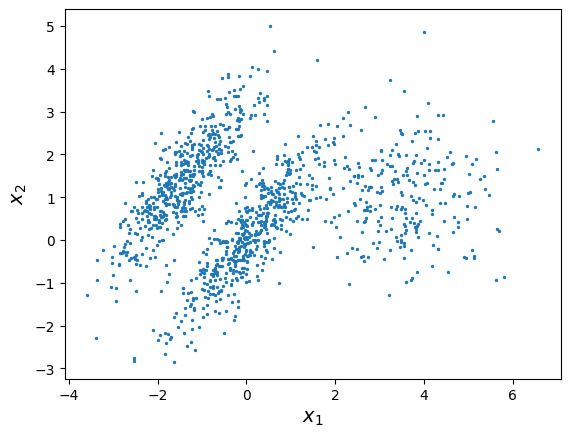

In [59]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plt.scatter(X[:,0], X[:,1], s=2)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [61]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

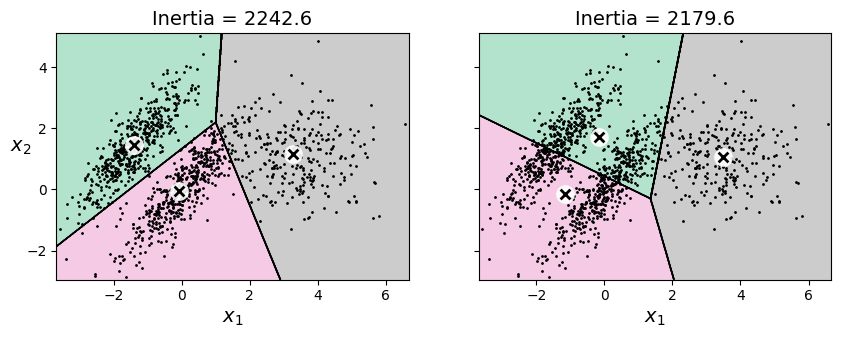

In [62]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

`Gaussian mixture models` works better in this case
* Reference: https://scikit-learn.org/stable/modules/mixture.html

## Applications of k-Means clustering

### Image segmentation
* Reference
    * https://matplotlib.org/tutorials/introductory/images.html
    * https://matplotlib.org/3.3.2/api/image_api.html

In [63]:
from matplotlib.image import imread
image = imread('../pics/ladybug.png')
image.shape

(533, 800, 3)

In [64]:
type(image)

numpy.ndarray

In [65]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [71]:
# kmeans.labels_

In [72]:
# kmeans.labels_.shape

In [73]:
x = np.array([1,2,3,4])
x[[0,0,1,1,2,2,3,3]]

array([1, 1, 2, 2, 3, 3, 4, 4])

In [66]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [67]:
kmeans.labels_

array([0, 0, 0, ..., 5, 5, 0], dtype=int32)

In [68]:
kmeans.cluster_centers_

array([[0.02197391, 0.10829669, 0.00567615],
       [0.9831093 , 0.9326913 , 0.02553865],
       [0.21325627, 0.38074526, 0.05518316],
       [0.60829306, 0.6286244 , 0.38579807],
       [0.3667915 , 0.51953304, 0.15321252],
       [0.0956641 , 0.2486789 , 0.01604258],
       [0.76501524, 0.19936322, 0.04393173],
       [0.87612635, 0.71745145, 0.03684875]], dtype=float32)

In [69]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

In [70]:
segmented_img.shape

(426400, 3)

In [71]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [75]:
segmented_img.shape

(533, 800, 3)

In [76]:
kmeans.cluster_centers_

array([[0.02197391, 0.10829672, 0.00567615],
       [0.9831093 , 0.9326913 , 0.02553865],
       [0.21325627, 0.38074526, 0.05518316],
       [0.60829306, 0.6286243 , 0.38579813],
       [0.3667915 , 0.51953304, 0.15321252],
       [0.0956641 , 0.2486789 , 0.01604258],
       [0.76501524, 0.19936322, 0.04393173],
       [0.8761263 , 0.71745145, 0.03684875]], dtype=float32)

In [77]:
kmeans.labels_

array([0, 0, 0, ..., 5, 5, 0], dtype=int32)

In [78]:
kmeans.cluster_centers_[kmeans.labels_]

array([[0.02197391, 0.10829672, 0.00567615],
       [0.02197391, 0.10829672, 0.00567615],
       [0.02197391, 0.10829672, 0.00567615],
       ...,
       [0.0956641 , 0.2486789 , 0.01604258],
       [0.0956641 , 0.2486789 , 0.01604258],
       [0.02197391, 0.10829672, 0.00567615]], dtype=float32)

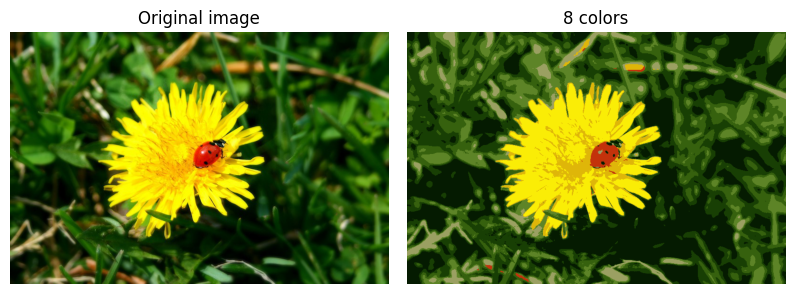

In [72]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(121)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

plt.subplot(122)
plt.imshow(segmented_img)
plt.title('8 colors')
plt.axis('off')
plt.show()

In [73]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
    

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explici

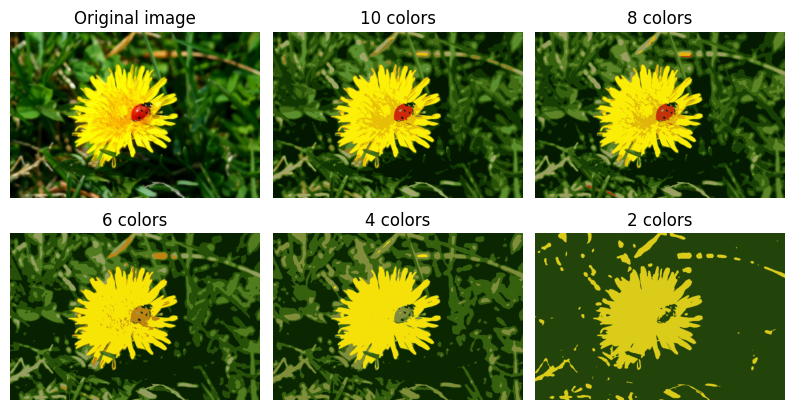

In [74]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### Data preprocessing


#### Using Clustering for Semi-Supervised Learning

* The data reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
* A dataset silimiar like the `MNIST database`: https://en.wikipedia.org/wiki/MNIST_database
* Each datapoint is a 8x8 image of a digit.
| Classes           | 10            |
|-------------------|---------------|
| Samples per class | ~180          |
| Samples total     | 1797          |
| Dimensionality    | 64            |
| Features          | integers 0-16 |

Let's tackle the _digits dataset_ which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

In [75]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [76]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [77]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [78]:
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

It's much less than earlier of course. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [79]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Now let's plot these representative images and label them manually:

In [80]:
X_representative_digits.shape

(50, 64)

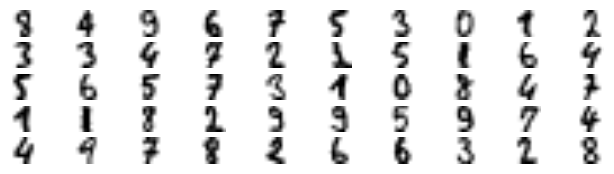

In [81]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')
    
plt.show()

In [82]:
y_representative_digits = np.array([
    8,4,9,6,7,5,3,0,1,2,
    3,3,4,7,2,1,5,1,6,4,
    5,6,5,7,3,1,0,8,4,7,
    1,1,8,2,9,9,5,9,7,4,
    4,9,7,8,2,6,6,3,2,8
])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [83]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8413098236775819

Wow! We jumped from 74.8% accuracy to 84.1%, although we are still only training the model on 50 instances

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

In [91]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [92]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [93]:
log_reg.score(X_test, y_test)

0.8639798488664987

We got another significant accuracy boost! Let's see if we can do even better by ignoring the 1% instances that are farthest from their cluster center: this should eliminate some outliers:

In [94]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [95]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8589420654911839

Wow, another accuracy boost! We have even slightly surpassed the performance we got by training on the fully labeled training set!

Our propagated labels are actually pretty good: their accuracy is about 97.6%:

In [96]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9548148148148148

In [97]:
## train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

## Create a pipeline that will first cluster the training set into 50 clusters
## and replace the images with their distances to these 50 clusters, then apply a Logistic Regression model

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [98]:
pipeline.score(X_test, y_test)

0.9733333333333334

In [99]:
%%time

## apply grid search on the optimal number of clusters

from sklearn.model_selection import GridSearchCV


param_grid = dict(kmeans__n_clusters=range(95, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=95; total time=   2.3s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=95; total time=   2.1s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=95; total time=   2.6s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=96; total time=   2.7s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=96; total time=   1.8s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=96; total time=   2.7s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=97; total time=   2.3s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=97; total time=   1.6s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=97; total time=   2.5s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=98; total time=   2.5s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=98; total time=   1.8s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=98; total time=   2.3s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=99; total time=   2.5s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=99; total time=   2.4s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=99; total time=   2.6s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: user 3min 22s, sys: 57 s, total: 4min 19s
Wall time: 37.5 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(95, 100)}, verbose=2)

In [100]:
grid_clf.best_params_

{'kmeans__n_clusters': 98}

In [101]:
grid_clf.score(X_test, y_test)

0.9777777777777777

### DBSCAN

The density-based spatial clustering of applications with noise (DBSCAN) algorithm defines clusters as continuous regions of high density. Here is how it works:

- For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.

- If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions.

- All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.

- Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

In [102]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [103]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [104]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [105]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

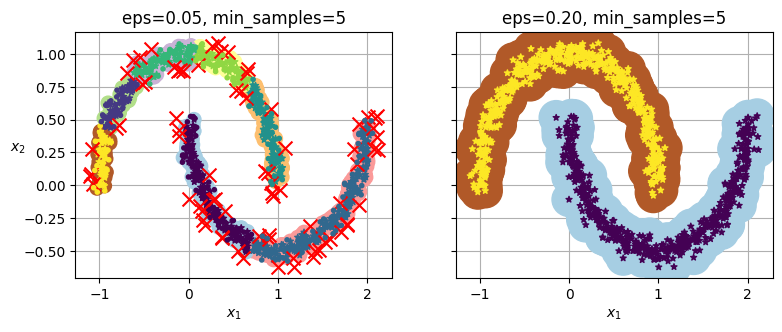

In [106]:
# extra code – this cell generates and saves Figure 9–14

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

The `DBSCAN` class does not have a predict() method, although it has a fit_predict() method. In other words, it cannot predict which cluster a new instance belongs to

In [107]:
dbscan = dbscan2

In [108]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [109]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [110]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

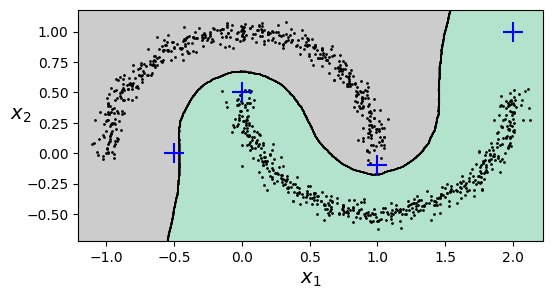

In [111]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

In [112]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

In [113]:
y_dist

array([[0.43045422],
       [0.02225568],
       [0.06010476],
       [0.48399468]])

In [115]:
y_pred_idx

array([[909],
       [325],
       [915],
       [231]])

In [116]:
y_pred

array([[-1],
       [ 0],
       [ 1],
       [-1]])